Special case of expectation maximization algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [27]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=6)

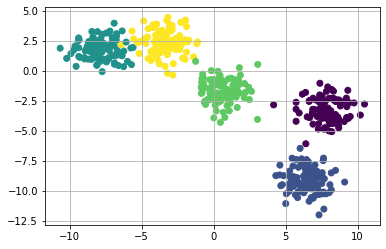

In [28]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

## Initialize cluster centers randomly

In [128]:
k = 5
color = ['green', 'red', 'blue', 'yellow', 'orange']
clusters = {}
for i in range(k) :
    center = 10 * (2 * np.random.random((X.shape[1],)) - 1) # generates random points
    points = []
    cluster = {
        'center': center,
        'points': points,
        'color': color[i]
    }
    clusters[i] = cluster

In [129]:
clusters

{0: {'center': array([-5.4072821 , -2.28848456]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.93656636,  4.26125628]),
  'points': [],
  'color': 'red'},
 2: {'center': array([4.49332793, 8.68662054]), 'points': [], 'color': 'blue'},
 3: {'center': array([-0.10455523, -9.78422299]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-0.4848545 ,  8.18608292]),
  'points': [],
  'color': 'orange'}}

## Assign each point to its nearest center (E(expectation) step)

In [130]:
def distance(v1, v2) :
    return np.sqrt(np.sum((v1 - v2)**2))

In [131]:
# distance(np.array([1, 2]), np.array([3, 5]))

In [132]:
def assignPointToClusters(clusters) :
    for ix in range(X.shape[0]) :
        dist = []
        curr_x = X[ix]

        for kx in range(k) :
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

In [133]:
assignPointToClusters(clusters)

## Update clusters (M(maximization) step)

In [134]:
def plotClusters(clusters) :
    for kx in range(k) :
        print(len(clusters[kx]['points']))
        pts = np.array(clusters[kx]['points'])
        # Plot points
        try :
            plt.scatter(pts[:, 0], pts[:, 1], color = clusters[kx]['color'])
        except :
            pass
        # Plot cluster centers
        uk = clusters[kx]['center'] # mu(k)
        plt.scatter(uk[0], uk[1], color = 'black', marker = 'x')

In [135]:
def updateClusters(clusters) : # M-step -> We update every cluster center according to the mean of the points in it
    for kx in range(k) :
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0 :
            new_u = pts.mean(axis = 0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []
    return clusters

139
156
7
198
0


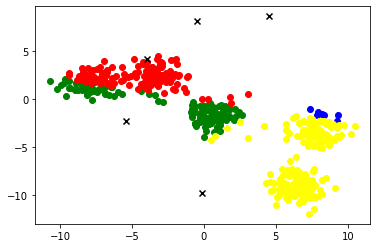

In [136]:
plotClusters(clusters)

99
101
99
101
100


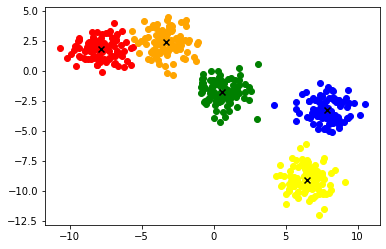

In [155]:
updateClusters(clusters)
assignPointToClusters(clusters)
plotClusters(clusters)